In [ ]:
#LOGISTIC REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

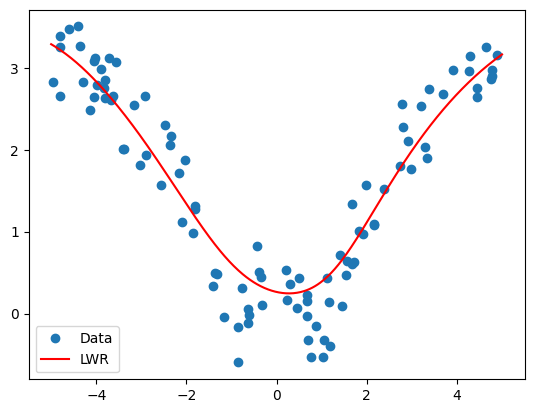

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
x_data = np.sort(np.random.uniform(-5, 5, size=100))
y_data = np.log(np.abs((x_data ** 2) - 1) + 0.5) + np.random.normal(scale=0.3, size=100)

def plot_lr(tau):
    """
    Plot the locally weighted regression curve.
    
    Parameters
    ----------
    tau : float
        The bandwidth parameter, which determines the degree of influence of nearby points.
    """
    domain = np.linspace(-5, 5, num=500)
    
    # Compute the predicted values at each point in the domain
    pred = [local_regression(x0, x_data, y_data, tau) for x0 in domain]
    
    # Plot the data and the LWR curve
    plt.plot(x_data, y_data, 'o', label='Data')
    plt.plot(domain, pred, color="red", label='LWR')
    plt.legend()
    return plt
    

def local_regression(x0, x_data, y_data, tau):
    """
    Perform locally weighted linear regression.
    
    Parameters
    ----------
    x0 : float
        The point at which to make a prediction.
    x_data : array-like, shape (n_samples,)
        The input data.
    y_data : array-like, shape (n_samples,)
        The target data.
    tau : float
        The bandwidth parameter, which determines the degree of influence of nearby points.
    
    Returns
    -------
    y_pred : float
        The predicted value at point x0.
    """
    x0 = np.r_[1, x0]  # Add a row of ones to include the intercept term
    x_data = np.c_[np.ones(len(x_data)), x_data]
    
    #This is done to introduce cofficient term
    
    # Compute the weights for each point
    weights = radial_kernel(x0, x_data, tau)
    # Add a column of ones to x_data to include the intercept term in the regression
    
    
    # Weight the input data and solve for the regression coefficients
    xw = x_data.T * weights
    beta = np.linalg.pinv(xw @ x_data) @ xw @ y_data
    # Compute the predicted value at x0
    #@ Matrix Multiplication
    
    y_pred = x0 @ beta

    return y_pred


def radial_kernel(x0, x_data, tau):
    """
    Compute the radial kernel function.
    
    Parameters
    ----------
    x0 : float
        The point at which to evaluate the kernel.
    x_data : array-like, shape (n_samples,)
        The data points.
    tau : float
        The bandwidth parameter, which determines the degree of influence of nearby points.
    
    Returns
    -------
    weights : array, shape (n_samples,)
        The weights for each data point.
    """
    return np.exp(np.sum((x_data - x0) ** 2, axis=1) / (-2 * tau ** 2))

plot_lr(1).show()